## GMD Submission data and plots

##### This notebook contains the scripts and data used to create the plots in the paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc('text', usetex=True)

font = {'family' : 'serif',
        'weight' : 'black',
        'size'   : 20}

plt.rc('font', **font)

plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

### Static benchmarks

In [3]:
# 3D - MX

NRad = 3
NTan = 5

# Delta function
uErrorDelta = [2.2462018121e-03, 8.0226869121e-04, 2.8464816966e-04]
uSurfErrorDelta = [3.6760006540e-06, 2.3336139233e-07, 2.1304487431e-08]
pErrorDelta = [1.3149098320e-01, 9.2776887017e-02, 6.5198358724e-02]

# Smooth function
uError = np.array([2.7728365567e-05, 2.1675694453e-06, 2.5388186171e-07])
uSurfError = np.array([4.8742168351e-06, 2.0344529986e-07, 1.6869319844e-08])
pError = np.array([1.4120574157e-03, 3.8090926226e-04, 9.4823458247e-05])

In [4]:
radialStressErrL2Projection_22 = [0.00157337, 0.000295374, 7.53773e-05]
radialStressErrCBF_22 = [0.00145199, 0.000248463, 6.20535e-05]

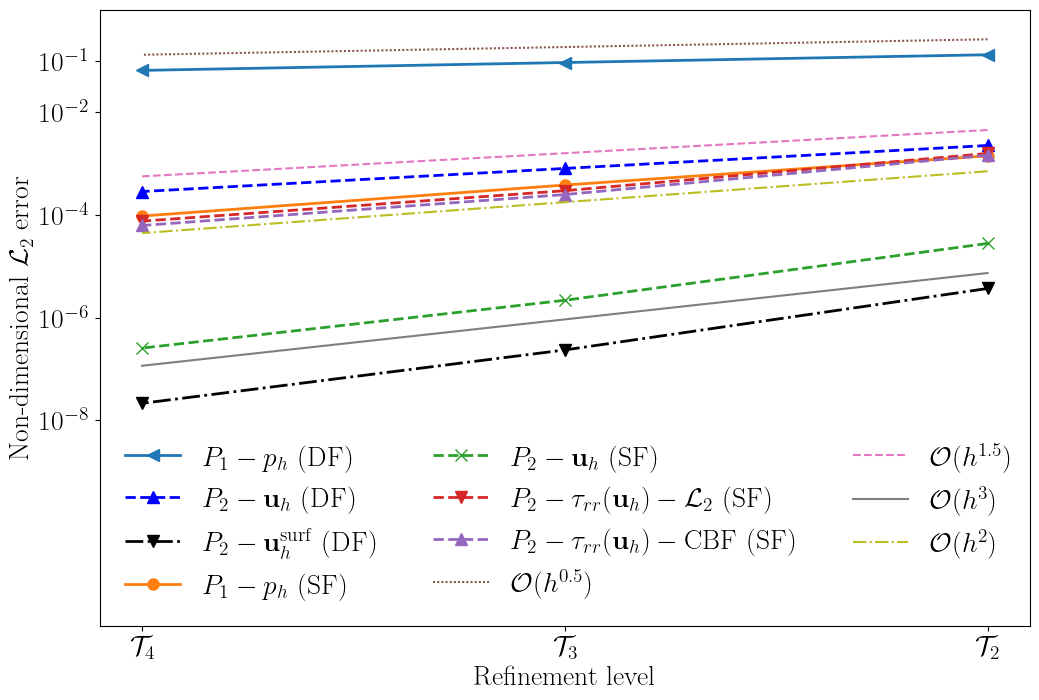

In [5]:
level = np.array([0.2, 0.1, 0.05])

fig, ax = plt.subplots()

ax.plot(
    level, pErrorDelta, "<-", markersize=8, linewidth=2, label="$P_1-p_h$ (DF)"
)

ax.plot(
    level, uErrorDelta, "^--", color="blue", markersize=8, linewidth=2, label="$P_2-\mathbf{u}_h$ (DF)"
)

ax.plot(
    level, uSurfErrorDelta, "v-.", color="black", markersize=8, linewidth=2, label=r"$P_2-\mathbf{u}_h^{\text{surf}}$ (DF)"
)


ax.plot(
    level, pError, "o-", markersize=8, linewidth=2, label="$P_1-p_h$ (SF)"
)

ax.plot(
    level, uError, "x--", markersize=8, linewidth=2, label="$P_2-\mathbf{u}_h$ (SF)"
)

ax.plot(
    level, radialStressErrL2Projection_22, "v--", markersize=8, linewidth=2, label=r"$P_2-\mathcal{\tau}_{rr}(\mathbf{u}_h)-\mathcal{L}_2$ (SF)"
)
ax.plot(
    level, radialStressErrCBF_22, "^--", markersize=8, linewidth=2, label=r"$P_2-\mathcal{\tau}_{rr}(\mathbf{u}_h)-\text{CBF}$ (SF)"
)

ax.plot(level, 2.0 * (pErrorDelta[0] / (level[0]**0.5)) * level ** (0.5), linestyle=(0, (1, 1)), label="$\mathcal{O}(h^{0.5})$")
ax.plot(level, 2.0 * (uErrorDelta[0] / (level[0]**1.5)) * level ** (1.5), '--', label = '$\mathcal{O}(h^{1.5})$')
ax.plot(level, 2.0 * (uSurfErrorDelta[0] / (level[0]**3)) * level ** (3), '-', label = '$\mathcal{O}(h^3)$')
ax.plot(level, 0.5 * (pError[0] / (level[0]**2)) * level ** (2), '-.', label="$\mathcal{O}(h^{2})$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Refinement level")
plt.ylabel("Non-dimensional $\mathcal{L}_2$ error")
plt.legend(ncol=3, framealpha=0.0, loc=0)

ax.set_xticks([], minor=True)
ax.set_xticks(level)
ax.set_xticklabels(["$\\mathcal{T}_2$", "$\\mathcal{T}_3$", "$\\mathcal{T}_4$"])

plt.ylim([1e-12, 1.0])
plt.yticks([])
plt.yticks([])
plt.yticks([1e-1, 1e-2, 1e-4, 1e-6, 1e-8])

figure = plt.gcf()
figure.set_size_inches(12, 8)

# plt.savefig('../static/sph-shell/incompressible/3D_NSFS_Smooth_Delta_With_Radial_Stress.svg', transparent=True, bbox_inches='tight')

In [6]:
# Data taken on April 7, 2025

NRad = 2
NTan = 2

minLevel = 2
level = [2, 3, 4]
cPenalty = [0.02, 0.01, 0.006]

FGMRES_iter = [25, 50, 100]

# 3D - FS - no penalty
uErrorNoPenalty = [4.4163947048e-04, 1.7646207046e-04, 2.0461704454e-03]
uSurfErrorNoPenalty = [1.4647078130e-04, 3.0595075700e-05, 2.3731973147e-04]
pErrorNoPenalty = [1.0521358978e-02, 2.5910310698e-03, 6.3947241298e-04]

# 3D - FS - penalty
uErrorPenalty = [4.5828564855e-04, 5.4891882059e-05, 1.4453213297e-05]
uSurfErrorPenalty = [1.5076662904e-04, 1.4024680318e-05, 2.1833653265e-06]
pErrorPenalty = [1.0519933245e-02, 2.5888483742e-03, 6.3846737106e-04]

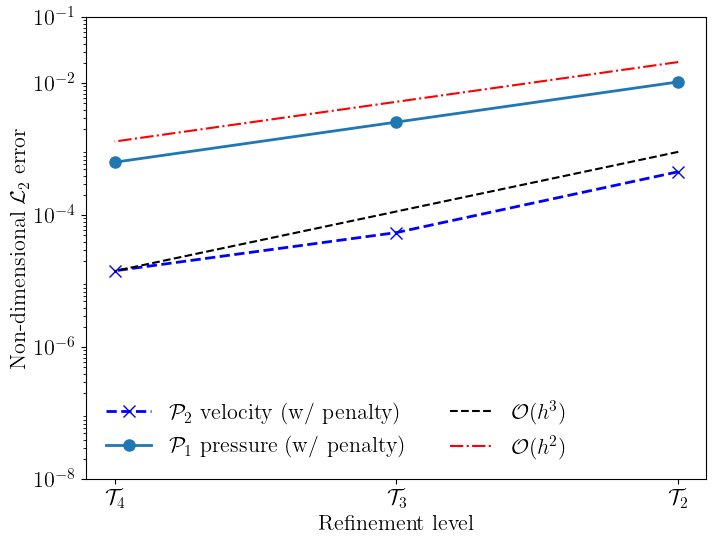

In [7]:
plt.rcParams.update({"font.size": 16})

level = np.array([0.2, 0.1, 0.05])

fig, ax = plt.subplots()
ax.plot(
    level, uErrorPenalty, "x--", color="blue", markersize=8, linewidth=2, label="$\mathcal{P}_2$ velocity (w/ penalty)"
)

# ax.plot(
#     level, uErrorNoPenalty, "v-.", color="black", markersize=8, linewidth=2, label="$\mathcal{P}_2$ velocity (w/o penalty)"
# )

ax.plot(
    level, pErrorPenalty, "o-", markersize=8, linewidth=2, label="$\mathcal{P}_1$ pressure (w/ penalty)"
)

# ax.plot(
#     level, pErrorNoPenalty, "^-", markersize=8, linewidth=2, label="$\mathcal{P}_1$ pressure (w/o penalty)"
# )

ax.plot(level, 2.0 * (uErrorPenalty[0] / (level[0]**3)) * level ** (3), '--', color = "black", label = '$\mathcal{O}(h^3)$')
ax.plot(level, 2.0 * (pErrorPenalty[0] / (level[0]**2)) * level ** (2), '-.', color = "red", label="$\mathcal{O}(h^2)$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Refinement level")
plt.ylabel("Non-dimensional $\mathcal{L}_2$ error")
plt.legend(ncol=2, framealpha=0.0, loc=0)

ax.set_xticks([], minor=True)
ax.set_xticks(level)
ax.set_xticklabels(["$\\mathcal{T}_2$", "$\\mathcal{T}_3$", "$\\mathcal{T}_4$"])

plt.yticks([])
plt.yticks([])
plt.yticks([1e-1, 1e-2, 1e-4, 1e-6, 1e-8])

figure = plt.gcf()
figure.set_size_inches(8, 6)

# plt.savefig('../static/sph-shell/incompressible/3D_FSFS_Penalty_Convergence.svg')

plt.rcParams.update({"font.size": 20})

### Response benchmark

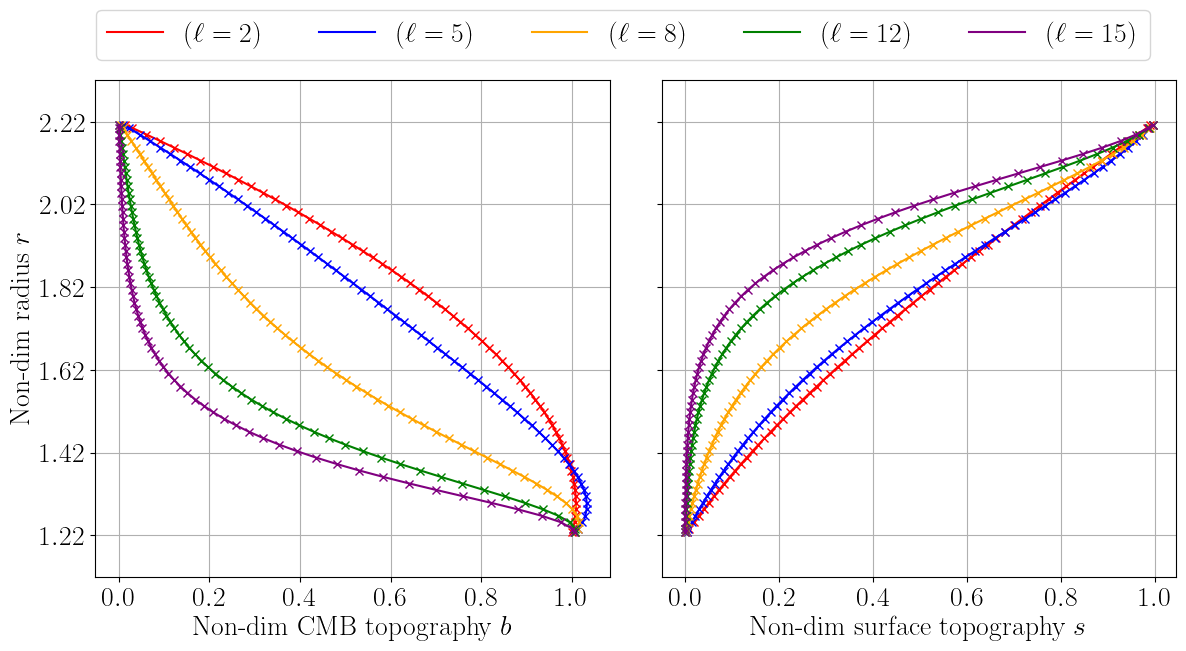

In [7]:
# plt.rcParams.update({"font.size": 20})

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.1)

# for l, c in zip([2, 5, 8], ['red', 'blue', 'orange']):
#     cmbTopography = np.loadtxt(f"../static/sph-shell/response_benchmark/sng-data/cmbTopography_l{l}.txt", delimiter=",")
    
#     ax1.plot(-cmbTopography[:, 1], cmbTopography[:, 0], 'x', markevery=1, color = c)
#     ax1.plot(-cmbTopography[:, 2], cmbTopography[:, 0], label=f"($\ell={l}$)", color = c)

for l, c in zip([2, 5, 8, 12, 15], ['red', 'blue', 'orange', 'green', 'purple']):
    cmbTopography = np.loadtxt(f"sng-data/cmbTopography_level4_lval{l}.txt", delimiter=",")
    
    ax1.plot(-cmbTopography[:, 1], cmbTopography[:, 0], 'x', markevery=1, color = c)
    ax1.plot(-cmbTopography[:, 2], cmbTopography[:, 0], label=f"($\ell={l}$)", color = c)

# ax1.legend()
ax1.grid(True)

ax1.set_ylim([1.12, 2.32])

ax1.set_yticks(1.22 + np.linspace(0.0, 1.0, 6))
ax1.set_ylabel('Non-dim radius $r$')
ax1.set_xlabel('Non-dim CMB topography $b$')
# ax1.set_title('CMB Topography')


# for l, c in zip([2, 5, 8], ['red', 'blue', 'orange']):
#     surfaceTopography = np.loadtxt(f"../static/sph-shell/response_benchmark/sng-data/surfaceTopography_l{l}.txt", delimiter=",")

#     ax2.plot(surfaceTopography[:, 1], surfaceTopography[:, 0], 'x', markevery=1, color = c)
#     ax2.plot(surfaceTopography[:, 2], surfaceTopography[:, 0], label=f"($\ell={l}$)", color = c)

for l, c in zip([2, 5, 8, 12, 15], ['red', 'blue', 'orange', 'green', 'purple']):
    surfaceTopography = np.loadtxt(f"sng-data/surfaceTopography_level4_lval{l}.txt", delimiter=",")

    ax2.plot(surfaceTopography[:, 1], surfaceTopography[:, 0], 'x', markevery=1, color = c)
    ax2.plot(surfaceTopography[:, 2], surfaceTopography[:, 0], label=f"($\ell={l}$)", color = c)

# ax2.legend()
ax2.grid(True)

ax2.set_ylim([1.12, 2.32])

ax2.set_yticks(1.22 + np.linspace(0.0, 1.0, 6))
ax2.set_xlabel('Non-dim surface topography $s$')
# ax2.set_title('Surface Topography')

# lines_labels = [ax.get_legend_handles_labels() for ax in f.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines, labels = ax1.get_legend_handles_labels()
f.legend(lines, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.075))

# plt.savefig('../static/sph-shell/response_benchmark/surface_and_cmb_topography.svg', transparent=True, bbox_inches='tight')

### Compressible benchmark

In [8]:
# Ns = np.array([7.3664359e+00, 7.4100304e+00, 7.3727045e+00])
# Ns_divdiv = np.array([7.3519993e+00, 7.3785069e+00, 7.2794502e+00])
# NTempLevel = np.array([3, 4, 5])

Di = 0.5

Ns_full_cbf = (Di * 273 / 3000) + np.array([6.96037, 7.27455, 7.37376, 7.41651, 7.43564])
Ns_frv_cbf = (Di * 273 / 3000) + np.array([6.96028, 7.27454, 7.37376, 7.41651, 7.43564])
Ns_frd_cbf = (Di * 273 / 3000) + np.array([6.96028, 7.27455, 7.37376, 7.41651, 7.43562])

Ns_full = np.array([7.6743155e+00, 7.5645380e+00, 7.4890021e+00, 7.4801580e+00, 7.4857258e+00])
Ns_frv = np.array([7.6742081e+00, 7.5645282e+00, 7.4890022e+00, 7.4801580e+00, 7.4857261e+00])
Ns_frd = np.array([7.6742141e+00, 7.5645310e+00, 7.4890021e+00, 7.4801573e+00, 7.4857039e+00])

velocityRMS = np.array([1.5215674e+02, 1.5542197e+02, 1.5715878e+02, 1.5809339e+02, 1.5871501e+02])

NTempLevel = np.array([2, 3, 4, 5, 6])

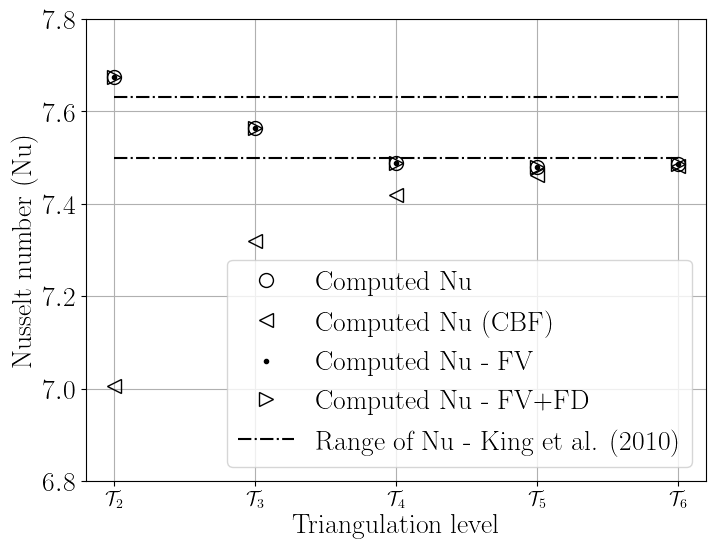

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.rcParams.update({'font.size': 20})

plt.plot(NTempLevel, Ns_full, 'o', markersize=10, fillstyle='none', color = 'black')

plt.plot(NTempLevel, Ns_full_cbf, '<', markersize=10, fillstyle='none', color = 'black')

plt.plot(NTempLevel, Ns_frv, '.', color = 'black')
plt.plot(NTempLevel, Ns_frd, '>', markersize=10, fillstyle='none', color = 'black')

plt.plot([NTempLevel[0], NTempLevel[-1]], [7.5, 7.5], '-.', color = 'black', label='_nolegend_')
plt.plot([NTempLevel[0], NTempLevel[-1]], [7.63, 7.63], '-.', color = 'black')
plt.grid(True)
# plt.yscale('log')
plt.xticks([2, 3, 4, 5, 6], ['$\\mathcal{T}_{' + str(i) + '}$' for i in [2, 3, 4, 5, 6]], fontsize=14, rotation=0)
plt.ylim([6.8, 7.8])
leg = plt.legend(['Computed Nu', 'Computed Nu (CBF)', 'Computed Nu - FV', 'Computed Nu - FV+FD', 'Range of Nu - King et al. (2010)'])

plt.xlabel('Triangulation level')
plt.ylabel('Nusselt number (Nu)')

figure = plt.gcf()
figure.set_size_inches(8, 6)

# plt.savefig('../time-dependent/king/KingNu.svg', transparent=True, bbox_inches='tight')

### Nonlinear benchmark

In [10]:
Ns = np.array([5.0110849, 5.6369069, 6.4995217, 6.6781026])
NTempLevel = np.array([2, 4, 8, 16])

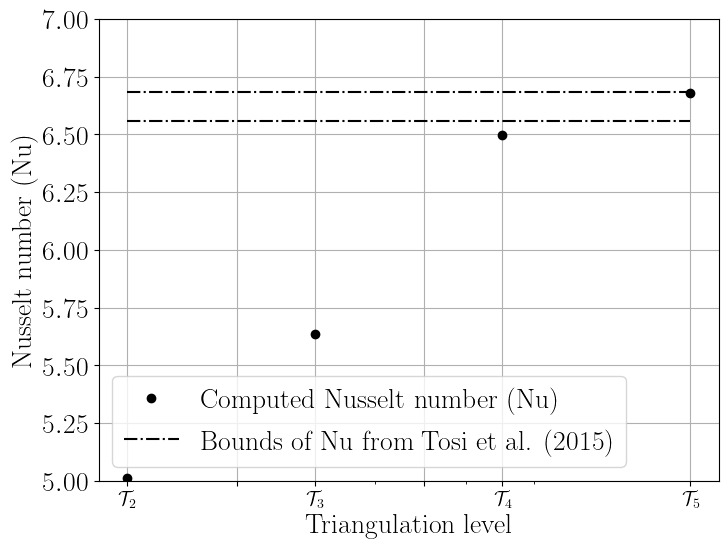

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# plt.rcParams.update({'font.size': 14})
plt.plot(NTempLevel, Ns, 'o', color = 'black')

plt.plot([NTempLevel[0], NTempLevel[-1]], [6.557, 6.557], '-.', color = 'black', label='_nolegend_')
plt.plot([NTempLevel[0], NTempLevel[-1]], [6.682, 6.682], '-.', color = 'black')

plt.grid(True)
plt.xscale('log')
plt.xticks([2, 3, 4, 6, 8, 16], ['$\\mathcal{T}_2$', '', '$\\mathcal{T}_3$', '', '$\\mathcal{T}_4$', '$\\mathcal{T}_5$'], fontsize=14, rotation=0)
plt.ylim([5.0, 7.0])
leg = plt.legend(['Computed Nusselt number (Nu)', 'Bounds of Nu from Tosi et al. (2015)', 'Predicted value of Nu from [3]'])

plt.xlabel('Triangulation level')
plt.ylabel('Nusselt number (Nu)')

figure = plt.gcf()
figure.set_size_inches(8, 6)

# plt.savefig('../time-dependent/tosi/TosiNu.svg', transparent=True, bbox_inches='tight')

### Spherical Shell benchmarks

In [12]:
temp_prof_A3_euen = np.loadtxt(f'sph-data/euen/A3.horiz.final.64')
temp_prof_C1_euen = np.loadtxt(f'sph-data/euen/C1.horiz.final.96')
temp_prof_C3_euen = np.loadtxt(f'sph-data/euen/C3.horiz.final.96')

In [13]:
temp_profA3_1 = np.loadtxt(f'sph-data/A3/rMu20_Part1.out', skiprows=1)
temp_profA3_2 = np.loadtxt(f'sph-data/A3/rMu20_Part2.out', skiprows=1)
temp_profA3_3 = np.loadtxt(f'sph-data/A3/rMu20_Part3.out', skiprows=1)


Text(0, 0.5, 'Non-dimensional $r$')

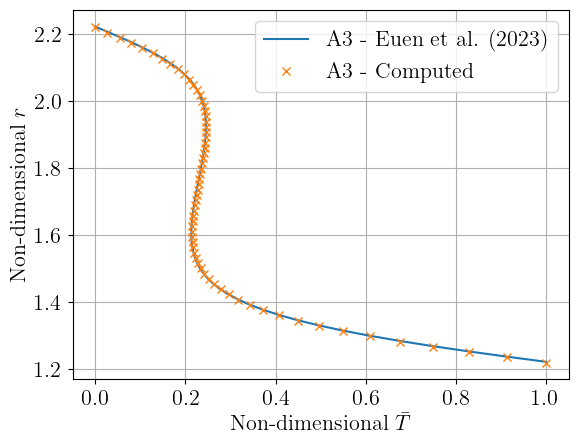

In [14]:
plt.rcParams.update({"font.size": 16})

plt.plot(temp_prof_A3_euen[:, 1], temp_prof_A3_euen[:, 0] / 0.45)
plt.plot(temp_profA3_3[:, 1], temp_profA3_3[:, 0], 'x')

plt.grid(True)

plt.legend(['A3 - Euen et al. (2023)', 'A3 - Computed'])

plt.xlabel('Non-dimensional $\\bar{T}$')
plt.ylabel('Non-dimensional $r$')

# plt.savefig('../time-dependent/profile/sphbench/TProfile_A3_Comparison.svg', transparent=True, bbox_inches='tight')

In [15]:
temp_prof_C1_7 = np.loadtxt(f'sph-data/C1_C3/rMu1_Part7.out', skiprows=1)
temp_prof_C3_8 = np.loadtxt(f'sph-data/C1_C3/rMu30_Part8.out', skiprows=1)


Text(0, 0.5, 'Non-dimensional $r$')

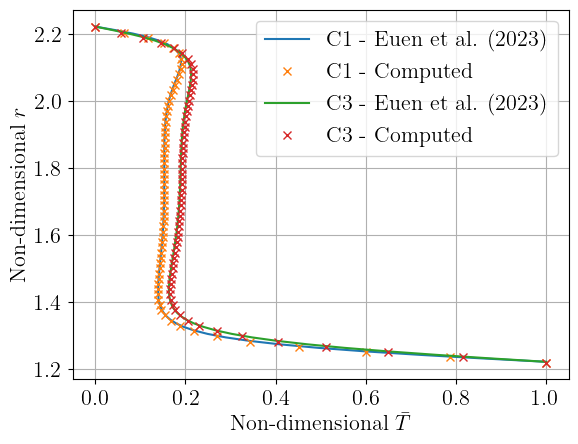

In [16]:
# plt.plot(temp_prof_C1_euen[:, 1], temp_prof_C1_euen[:, 0] / 0.45)
# plt.plot(temp_prof_C1_7[:, 1], temp_prof_C1_7[:, 0])

plt.plot(temp_prof_C1_euen[:, 1], temp_prof_C1_euen[:, 0] / 0.45)
plt.plot(temp_prof_C1_7[:, 1], temp_prof_C1_7[:, 0], 'x')

plt.plot(temp_prof_C3_euen[:, 1], temp_prof_C3_euen[:, 0] / 0.45)
plt.plot(temp_prof_C3_8[:, 1], temp_prof_C3_8[:, 0], 'x')

plt.grid(True)

plt.legend(['C1 - Euen et al. (2023)', 'C1 - Computed', 'C3 - Euen et al. (2023)', 'C3 - Computed'])

plt.xlabel('Non-dimensional $\\bar{T}$')
plt.ylabel('Non-dimensional $r$')

# plt.savefig('../time-dependent/profile/sphbench/TProfile_C1_C3_Comparison.svg', transparent=True, bbox_inches='tight')

| Case\Code | HyTeG | ASPECT | CitComS |
|-----------|-------| ------ | ------- |
| A3        | 3.139 | 3.14 to 3.15 | 3.15 - 3.19      |
| C1        | 7.758 | 6.78 to 7.81 | 7.37 - 7.81      |
| C3        | 6.756 | 6.50 to 6.79 | 6.62 - 6.75      |

#### Velocity profile

In [18]:
velrms_prof_A3 = np.loadtxt(f'sph-data/A3/Velocity_A3.txt', skiprows=1)
velrms_prof_C1 = np.loadtxt(f'sph-data/C1_C3/Velocity_C1.txt', skiprows=1)
velrms_prof_C3 = np.loadtxt(f'sph-data/C1_C3/Velocity_C3.txt', skiprows=1)


Text(0, 0.5, 'Non-dimensional $r$')

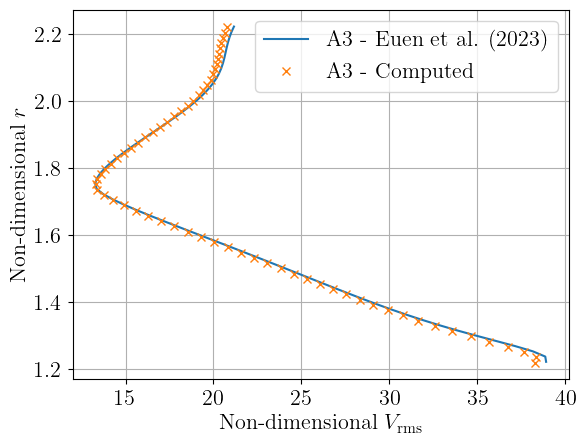

In [19]:
# plt.rcParams.update({"font.size": 16})

plt.plot(temp_prof_A3_euen[:, 5] * 0.45, temp_prof_A3_euen[:, 0] / 0.45)
plt.plot(velrms_prof_A3[:, 1], velrms_prof_A3[:, 0], 'x')

plt.grid(True)

plt.legend(['A3 - Euen et al. (2023)', 'A3 - Computed'])

plt.xlabel('Non-dimensional $V_{\\text{rms}}$')
plt.ylabel('Non-dimensional $r$')

# plt.savefig('../time-dependent/profile/sphbench/VProfile_A3_Comparison.svg', transparent=True, bbox_inches='tight')

Text(0, 0.5, 'Non-dimensional $r$')

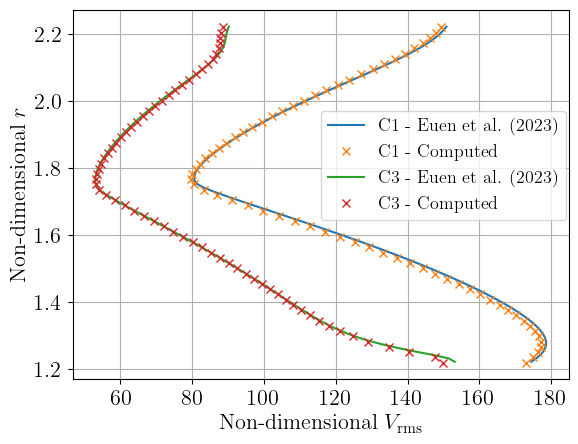

In [20]:
# plt.rcParams.update({"font.size": 16})

plt.plot(temp_prof_C1_euen[:, 5] * 0.45, temp_prof_C1_euen[:, 0] / 0.45)
plt.plot(velrms_prof_C1[:, 1], velrms_prof_C1[:, 0], 'x')

plt.plot(temp_prof_C3_euen[:, 5] * 0.45, temp_prof_C3_euen[:, 0] / 0.45)
plt.plot(velrms_prof_C3[:, 1], velrms_prof_C3[:, 0], 'x')

plt.grid(True)

plt.legend(['C1 - Euen et al. (2023)', 'C1 - Computed', 'C3 - Euen et al. (2023)', 'C3 - Computed'], fontsize=13, loc=(0.5, 0.43))

plt.xlabel('Non-dimensional $V_{\\text{rms}}$')
plt.ylabel('Non-dimensional $r$')

# plt.savefig('../time-dependent/profile/sphbench/VProfile_C1_C3_Comparison.svg', transparent=True, bbox_inches='tight')

Text(0, 0.5, 'Non-dimensional $r$')

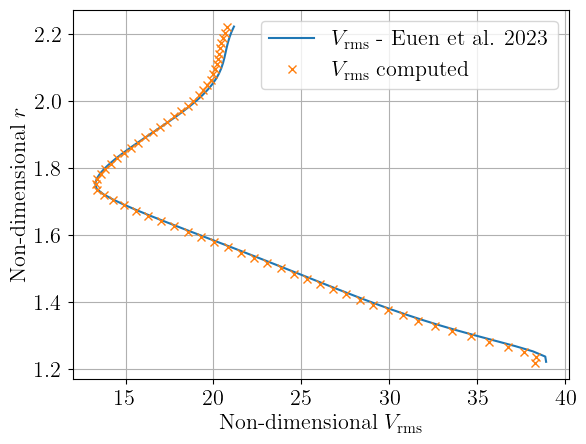

In [21]:
plt.rcParams.update({"font.size": 16})

plt.plot(temp_prof_A3_euen[:, 5] * 0.45, temp_prof_A3_euen[:, 0] / 0.45)
plt.plot(velrms_prof_A3[:, 1], velrms_prof_A3[:, 0], 'x')

plt.grid(True)

plt.legend(['$V_{\\text{rms}}$ - Euen et al. 2023', '$V_{\\text{rms}}$ computed'])

plt.xlabel('Non-dimensional $V_{\\text{rms}}$')
plt.ylabel('Non-dimensional $r$')

# plt.savefig('../time-dependent/profile/sphbench/VProfile_A3_Comparison.svg', transparent=True, bbox_inches='tight')

#### Nu vs Ra

In [22]:
rMu = [3, 10, 20, 30, 40, 100, 500, 700, 1000]
Racrit = [805.06, 963.07, 1095.56, 1188.52, 1322.58, 1535.20, 2153.50, 2299.43, 2457.29]
Racrit_ = [805.06, 1095.56, 1188.52, 1322.58, 1535.20, 2153.50, 2299.43, 2457.29]
RacritDict = dict(zip(rMu, Racrit))

Nu = {}
# Nu[7e3] = [3.65924, 3.51588, 3.41084, 3.34386, 3.29406, 3.12456, 2.78735, 2.69646, 2.61606]
# Nu[2e4] = [5.21892, 4.88884, 4.8259, 4.76198, 4.55985, 4.23934, 4.05199, 3.95214]
# Nu[4e4] = [6.71435, 6.49083, 6.17984, 5.85505, 5.71333, 5.92764, 5.16727, 4.85097, 4.75736]
# Nu[6e4] = [7.74617, 7.58472, 6.45191, 6.24243, 7.83757, 6.52, 5.57346, 5.24087, 5.47033]

Nu[7e3] = [3.65924, 3.51588, 3.41084, 3.29406, 3.12456, 2.78735, 2.69646, 2.61606]
Nu[2e4] = [5.21892, 4.88884, 4.8259, 4.76198, 4.55985, 4.23934, 4.05199, 3.95214]
Nu[4e4] = [6.71435, 6.49083, 6.17984, 5.71333, 5.92764, 5.16727, 4.85097, 4.75736]
Nu[6e4] = [7.74617, 7.58472, 6.45191, 7.83757, 6.52, 5.57346, 5.24087, 5.47033]

RaVals = []
RaVals += list(np.array([7e3]*8) / np.array(Racrit_))
RaVals += list(np.array([2e4]*8) / np.array(Racrit_))
RaVals += list(np.array([4e4]*8) / np.array(Racrit_))
RaVals += list(np.array([6e4]*8) / np.array(Racrit_))

NuVals = []
NuVals += Nu[7e3] + Nu[2e4] + Nu[4e4] + Nu[6e4]

Text(0, 0.5, 'Nusselt Number (Nu)')

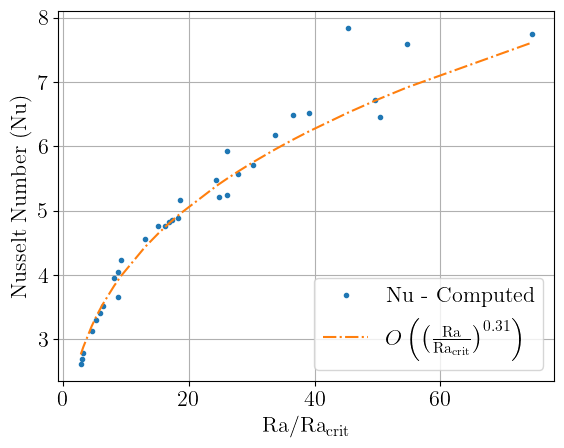

In [23]:
plt.plot(RaVals, NuVals, '.')
plt.plot(np.sort(RaVals), 2.0*np.sort(RaVals)**0.31, '-.')
# plt.plot(np.sort(RaVals), 2.0*np.sort(RaVals)**0.26, '-.')
# plt.plot(np.sort(RaVals), 2.0*np.sort(RaVals)**0.36, '-.')


plt.grid(True)

plt.legend(['Nu - Computed', '$O\left(\left(\\frac{\\text{Ra}}{\\text{Ra}_{\\text{crit}}}\\right)^{0.31}\\right)$'])

# plt.xlabel(r'$\frac{Ra}{Ra_{\text{crit}}}$')
plt.xlabel(r'$\displaystyle \text{Ra} / \text{Ra}_{\text{crit}}$')
plt.ylabel('Nusselt Number (Nu)')

# plt.savefig('../time-dependent/sphbench/cubic_Nu_vs_RaRacrit.svg', transparent=True, bbox_inches='tight')

### Scalability

In [24]:
swnawrp0_l6_nnodes = [2, 8, 32, 64, 128, 256]
swnawrp0_l6_timing = [490.6479, 452.547, 477.773, 488.399, 480.362, 504.607]

swavwrp0_l6_nnodes = [2, 8, 64, 128, 256]
swavwrp0_l6_timing = [114.6767, 115.7538, 132.5907, 125.8928, 146.1155]

In [25]:
plt.rcParams.update({"font.size": 18})

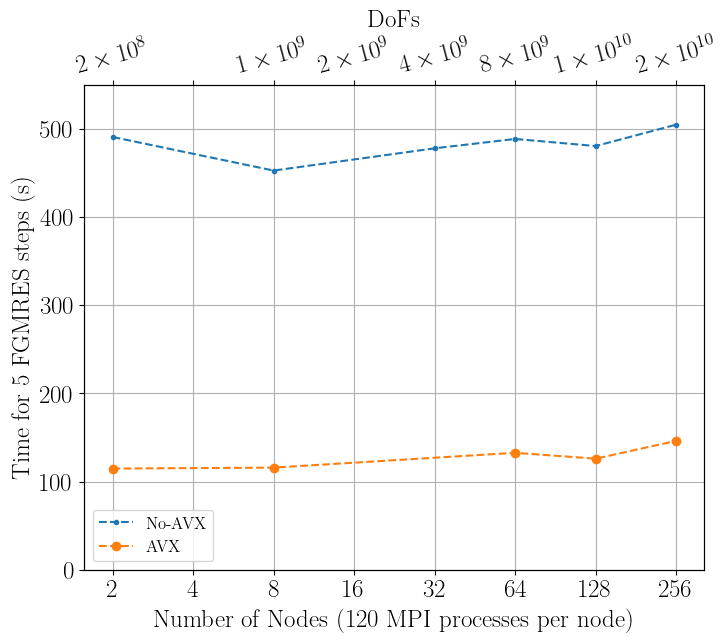

In [26]:
fig, ax = plt.subplots()

ax.plot(swnawrp0_l6_nnodes, swnawrp0_l6_timing, '.--')
ax.plot(swavwrp0_l6_nnodes, swavwrp0_l6_timing, 'o--')

plt.ylim([0, 550])

# ax.set_yscale('log', base=10)
# ax.set_yticks([10, 100, 1000])

ax.set_xscale('log', base=2)

# ax.set_ylim([0, 550])

ax2 = ax.twiny()
ax2.set_xscale('log', base=2)

ax.legend(['No-AVX', 'AVX'], prop={'size': 12})
ax.set_ylabel('Time for 5 FGMRES steps (s)')

ax.grid(True)

plt.xticks([2, 4, 8, 16, 32, 64, 128, 256])

xtickstr = [str(i) for i in [2, 4, 8, 16, 32, 64, 128, 256]]

# ax.set_yscale('log')

ax.set_xticks([2, 4, 8, 16, 32, 64, 128, 256])
ax.set_xticklabels(xtickstr)
ax.set_xlabel("Number of Nodes ($120$ MPI processes per node)")

ax2.set_xlim(ax.get_xlim())
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_xticks([2, 4, 8, 16, 32, 64, 128, 256])
ax2.set_xticklabels(["$2\\times 10^8$", "", "$1\\times 10^9$", "$2\\times 10^9$", "$4\\times 10^9$", "$8\\times 10^9$", "$1\\times 10^{10}$", "$2\\times 10^{10}$"], rotation=15)
ax2.set_xlabel("DoFs")

figure = plt.gcf()
figure.set_size_inches(8, 6.3)

# plt.savefig('../scaling/weak_scaling_level6_noavx_avx_sawtooth.svg')

In [27]:
swav_l7_nnodes = [2, 8, 16, 32, 64]
swav_l7_timing = [5.179017e+02, 5.663018e+02, 5.644758e+02, 5.895302e+02, 6.187581e+02]
l7_dofs = [2105673480, 8422688520, 16811298312, 33588517896, 67245182472]

swav_l6_nnodes = [2, 8, 16, 32, 64, 128, 256, 512]
swav_l6_timing = [8.258941e+01, 7.930311e+01, 8.108212e+01, 9.144764e+01, 8.790192e+01, 9.163154e+01, 1.009501e+02, 1.214536e+02]
l6_dofs = [264274824, 1057096584, 2105673480, 4202827272, 8422688520, 16811298312, 33588517896]

swav_l5_nnodes = [2, 8, 16, 32, 64, 128, 256, 512]
swav_l5_timing = [1.894893e+01, 2.032355e+01, 2.051243e+01, 1.786776e+01, 1.899959e+01, 2.049351e+01, 2.166697e+01, 2.285642e+01]
l5_dofs = [33300936, 133202376, 264274824, 526419720, 1057096584, 2105673480, 4202827272, 8422688520]

swav_l4_nnodes = [2, 8, 16, 64, 128, 256, 512]
swav_l4_timing  = [4.733440e+00, 5.933833e+00, 5.915338e+00, 7.492913e+00, 7.730477e+00, 7.645039e+00, 8.798342e+00]
l4_dofs = [4229352, 16916712, 33300936, 133202376, 264274824, 526419720, 1057096584]

swav_l7_s1r2_nnodes = [2, 16, 32, 64, 128]
swav_l7_s1r2_timing = [3.917593e+02, 4.130062e+02, 4.017472e+02, 4.607425e+02, 4.430059e+02]
l7_dofs_s1r2 = [2105673480, 16811298312, 33588517896, 67245182472, 134354050056]

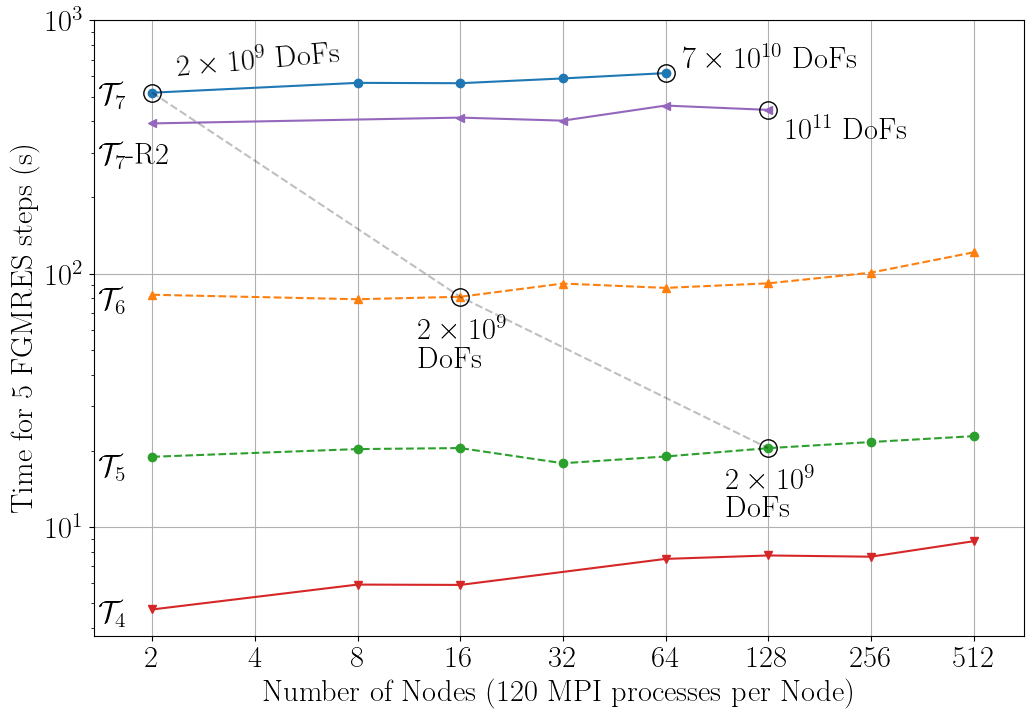

In [28]:
# plt.rc('text', usetex=True)

# font = {'family' : 'sans-serif',
#         'weight' : 'black',
#         'size'   : 16}

# plt.rc('font', **font)

plt.rcParams.update({"font.size": 22})

fig, ax = plt.subplots()

plt.plot(swav_l7_nnodes, swav_l7_timing, 'o-')
plt.plot(swav_l6_nnodes, swav_l6_timing, '^--')
plt.plot(swav_l5_nnodes, swav_l5_timing, 'o--')
plt.plot(swav_l4_nnodes, swav_l4_timing, 'v-')
plt.plot(swav_l7_s1r2_nnodes, swav_l7_s1r2_timing, '<-')

plt.plot([swav_l7_nnodes[0], swav_l6_nnodes[2], swav_l5_nnodes[5]], [swav_l7_timing[0], swav_l6_timing[2], swav_l5_timing[5]], '--', color='black', alpha=0.25)

plt.plot(swav_l7_nnodes[0], swav_l7_timing[0], 'o', color='black', markersize=12.5, fillstyle='none')
plt.plot(swav_l6_nnodes[2], swav_l6_timing[2], 'o', color='black', markersize=12.5, fillstyle='none')
plt.plot(swav_l5_nnodes[5], swav_l5_timing[5], 'o', color='black', markersize=12.5, fillstyle='none')
plt.plot(swav_l7_nnodes[4], swav_l7_timing[4], 'o', color='black', markersize=12.5, fillstyle='none')
plt.plot(swav_l7_s1r2_nnodes[4], swav_l7_s1r2_timing[4], 'o', color='black', markersize=12.5, fillstyle='none')
# plt.plot(swav_l4_nnodes[-1], swav_l4_timing[-1], 'o', markersize=12.5, fillstyle='none')


plt.text(swav_l7_nnodes[0] + 0.35, swav_l7_timing[0] + 100, '$2\\times 10^9$ DoFs', rotation=5)
plt.text(swav_l6_nnodes[2] - 4, swav_l6_timing[0] - 40, '$2\\times 10^9$\nDoFs')
plt.text(swav_l5_nnodes[5] - 32, swav_l5_timing[0] - 8, '$2\\times 10^9$\nDoFs')
plt.text(swav_l7_nnodes[4] + 8, swav_l7_timing[0] + 150, '$7\\times 10^{10}$ DoFs')
plt.text(swav_l7_s1r2_nnodes[4] + 16, swav_l7_s1r2_timing[0] - 50, '$10^{11}$ DoFs')
# plt.text(swav_l4_nnodes[-1] - 120, swav_l4_timing[-1] - 4.75, '$10^{9}$\nDoFs')

plt.xlim([1.35, 720])

plt.text(swav_l7_nnodes[0] - 0.6, swav_l7_timing[0] - 50, '$\mathcal{T}_7$')
plt.text(swav_l6_nnodes[0] - 0.6, swav_l6_timing[0] - 10, '$\mathcal{T}_6$')
plt.text(swav_l5_nnodes[0] - 0.6, swav_l5_timing[0] - 3, '$\mathcal{T}_5$')
plt.text(swav_l4_nnodes[0] - 0.6, swav_l4_timing[0] - 0.5, '$\mathcal{T}_4$')

plt.text(swav_l7_s1r2_nnodes[0] - 0.6, swav_l7_s1r2_timing[0] - 120, '$\mathcal{T}_7$-R2')

plt.xscale('log', base=2)
plt.yscale('log')

plt.xlabel('Number of Nodes (120 MPI processes per Node)')
plt.ylabel('Time for 5 FGMRES steps (s)')

plt.grid(True)

plt.xticks([2, 4, 8, 16, 32, 64, 128, 256, 512])
plt.yticks([10, 100, 1000])

xtickstr = [str(i) for i in [2, 4, 8, 16, 32, 64, 128, 256, 512]]
# xtickstr[-1] = '512\n(61k procs)'

ax.set_xticklabels(xtickstr)

figure = plt.gcf()
figure.set_size_inches(12, 8)

# plt.savefig('../scaling/weak_scaling_level4567_avx_s3r2_sawtooth_modified.svg')

### EOF